In [81]:
import pandas as pd
#Because dataset is big (29 columns) we need to show every columns using pd
pd.set_option('max_columns', None)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
file = pd.read_excel(r"C:\Users\Michel\git2\Ironhack-DAFT-Project6-Descriptive_predictive_analysis_visualization_in_Tableau\Payments.xlsx")#,sep=';')
file.head()
#We make a copy of the file and work on it
file.head()


,Debtor,Creditor,Type,Reference,Initial Amount,Currency,Bank,Charges,Date,Time (local),Status
0,Alpha Inc,ACME INVEST.,fin.101,REF211,10000.0,USD,CHASUS3AXXX,0.020,2021-03-16,08:15:00,NEW
1,Alpha Inc,ACME INVEST.,fin.101,REF211,10000.0,USD,BINAADADXXX,0.015,2021-03-17,15:45:00,COMPLETED
2,Alpha Inc,ACME ONE CORP.,fin.101,REFTEST01,4537.0,USD,CHASUS3AXXX,0.020,2021-03-16,00:00:00,NEW
3,Alpha Inc,ACME ONE CORP.,fin.101,REFTEST01,4537.0,USD,BINAADADXXX,0.010,2021-03-16,12:45:00,PENDING
4,Alpha Inc,ACME ONE CORP.,fin.101,REFTEST01,4537.0,USD,BSJUARBJXXX,0.020,2021-03-18,14:15:00,COMPLETED


First we have a quick preview at the data set with head() function.
Now let's look at the info of the file.

In [82]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Debtor          90 non-null     object        
 1   Creditor        90 non-null     object        
 2   Type            90 non-null     object        
 3   Reference       90 non-null     object        
 4   Initial Amount  90 non-null     float64       
 5   Currency        90 non-null     object        
 6   Bank            90 non-null     object        
 7   Charges         90 non-null     float64       
 8   Date            90 non-null     datetime64[ns]
 9   Time (local)    90 non-null     object        
 10  Status          90 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 7.9+ KB


In [83]:
file.shape

(90, 11)

In [118]:
## We look for non-numeric data
cat_df = file.select_dtypes(include=['object','datetime'])
cat_df.head(5)

,Debtor,Creditor,Reference,Currency,Bank,Date,Time (local),Status
0,Alpha Inc,ACME INVEST.,REF211,USD,CHASUS3AXXX,2021-03-16,08:15:00,NEW
1,Alpha Inc,ACME INVEST.,REF211,USD,BINAADADXXX,2021-03-17,15:45:00,COMPLETED
2,Alpha Inc,ACME ONE CORP.,REFTEST01,USD,CHASUS3AXXX,2021-03-16,00:00:00,NEW
3,Alpha Inc,ACME ONE CORP.,REFTEST01,USD,BINAADADXXX,2021-03-16,12:45:00,PENDING
4,Alpha Inc,ACME ONE CORP.,REFTEST01,USD,BSJUARBJXXX,2021-03-18,14:15:00,COMPLETED


In [115]:
# We look for numeric data
num_df = file.select_dtypes(exclude=['object','datetime'])
num_df.head(5)

,Initial Amount,Charges
0,10000.0,0.020
1,10000.0,0.015
2,4537.0,0.020
3,4537.0,0.010
4,4537.0,0.020


In [97]:
def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")

In [98]:
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
Debtor
Creditor
Type
Reference
Currency
Bank
Date
Time (local)
Status

Numeric columns:
Initial Amount
Charges


In [99]:
## Check for duplicates
file.duplicated().any()

False

In [100]:
file.loc[file['Reference'].duplicated(), :]

,Debtor,Creditor,Type,Reference,Initial Amount,Currency,Bank,Charges,Date,Time (local),Status
1,Alpha Inc,ACME INVEST.,fin.101,REF211,10000.0,USD,BINAADADXXX,0.015,2021-03-17,15:45:00,COMPLETED
3,Alpha Inc,ACME ONE CORP.,fin.101,REFTEST01,4537.0,USD,BINAADADXXX,0.010,2021-03-16,12:45:00,PENDING
4,Alpha Inc,ACME ONE CORP.,fin.101,REFTEST01,4537.0,USD,BSJUARBJXXX,0.020,2021-03-18,14:15:00,COMPLETED
5,Alpha Inc,ACME PRIVATE.,fin.101,REF211,1000000.0,USD,CHASUS3AXXX,0.010,2021-11-02,08:34:00,NEW
6,Alpha Inc,ACME PRIVATE.,fin.101,REF211,1000000.0,EUR,AGRIFRPPXXX,0.015,2021-11-03,12:40:00,PENDING
...,...,...,...,...,...,...,...,...,...,...,...
85,Alpha Inc,ALT-2 INC,fin.101,REFD202103,17430.0,USD,CHASUS3AXXX,0.020,2021-07-12,15:41:00,PENDING
86,Alpha Inc,ALT-2 INC,fin.101,REFD202103,17430.0,USD,CHASUS3AXXX,0.010,2021-07-13,18:10:00,DELIVERED
87,Alpha Inc,Beta Corp,fin.101,REF001,12000.0,USD,CHASUS3AXXX,0.010,2021-10-05,12:43:00,NEW
88,Alpha Inc,Beta Corp,fin.101,REF001,12000.0,USD,CHASUS3AXXX,0.020,2021-10-05,14:32:00,PENDING


In [101]:
## Missing data check
file.isna().sum()

Debtor            0
Creditor          0
Type              0
Reference         0
Initial Amount    0
Currency          0
Bank              0
Charges           0
Date              0
Time (local)      0
Status            0
dtype: int64

In [102]:
#Check all the lines with missing data
file[file.isna().any(axis=1)]

,Debtor,Creditor,Type,Reference,Initial Amount,Currency,Bank,Charges,Date,Time (local),Status


In [103]:
## Data inconsistency check
file.describe()

,Initial Amount,Charges
count,90.000000,90.000000
mean,43723.322222,0.023444
std,179500.867871,0.022755
min,120.000000,0.010000
25%,1100.000000,0.010000
50%,4569.000000,0.015000
75%,12000.000000,0.020000
max,1000000.000000,0.080000


In [104]:
#Check the mode values
#file.mode(self, axis=0, numeric_only=True, dropna=True)
file.mode(numeric_only=False,dropna=True)
#file.mode(numeric_only=False,dropna=True)['Income'][0]

,Debtor,Creditor,Type,Reference,Initial Amount,Currency,Bank,Charges,Date,Time (local),Status
0,Alpha Inc,Beta Corp,fin.101,REF211,1100.0,USD,CHASUS3AXXX,0.01,2021-03-16,18:10:00,NEW
1,NaN,NaN,NaN,NaN,12000.0,NaN,NaN,NaN,NaT,NaN,NaN


<Figure size 720x432 with 0 Axes>

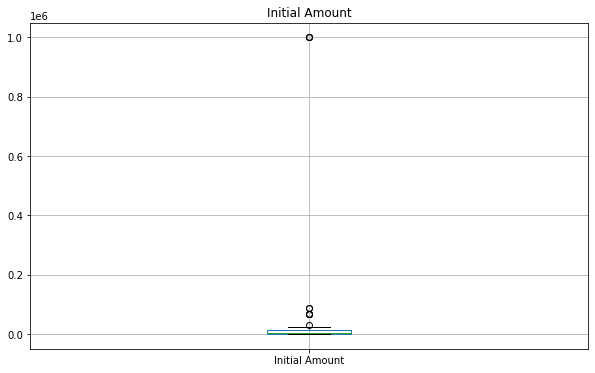

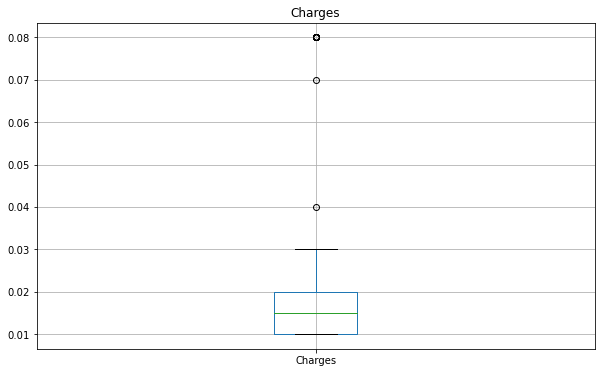

In [105]:
#Check Outliers

# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    file.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [106]:
file[file['Initial Amount'] > 500000]

,Debtor,Creditor,Type,Reference,Initial Amount,Currency,Bank,Charges,Date,Time (local),Status
5,Alpha Inc,ACME PRIVATE.,fin.101,REF211,1000000.0,USD,CHASUS3AXXX,0.010,2021-11-02,08:34:00,NEW
6,Alpha Inc,ACME PRIVATE.,fin.101,REF211,1000000.0,EUR,AGRIFRPPXXX,0.015,2021-11-03,12:40:00,PENDING
7,Alpha Inc,ACME PRIVATE.,fin.101,REF211,1000000.0,EUR,REDJBY22XXX,0.015,2021-11-03,17:34:00,COMPLETED


In [107]:
#No outlier on Initial amount after analysis

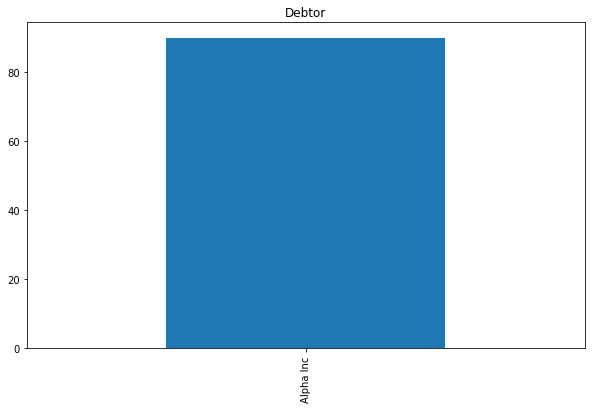

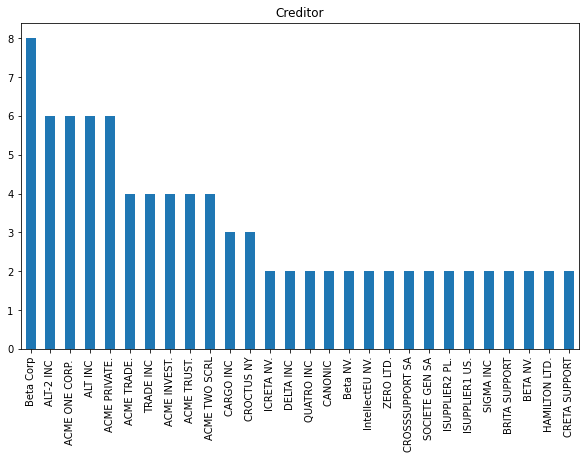

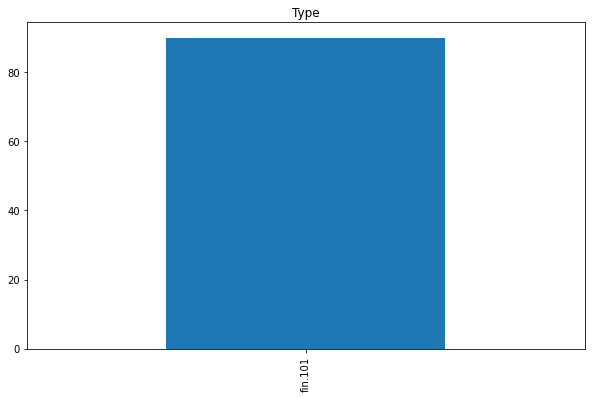

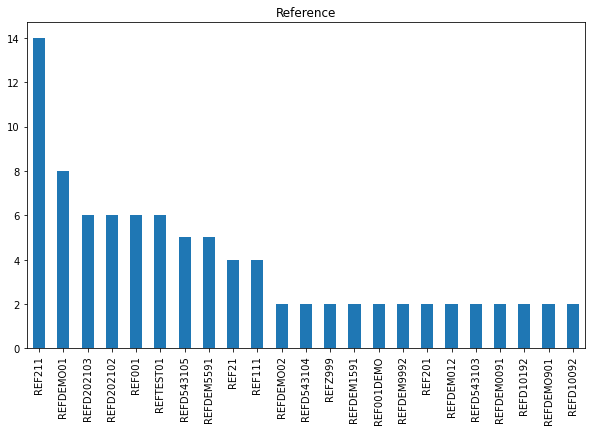

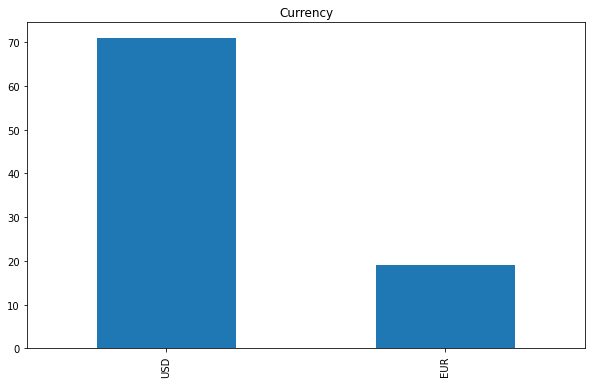

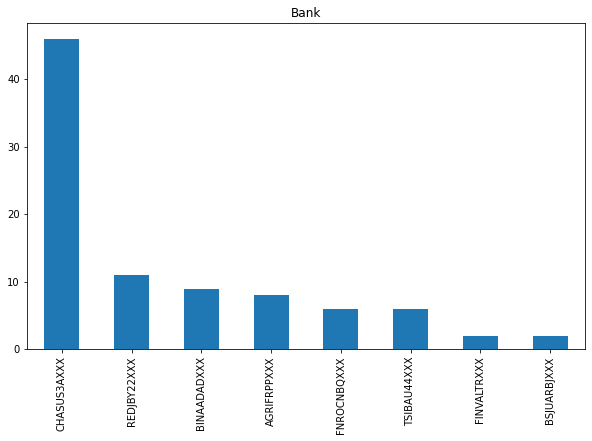

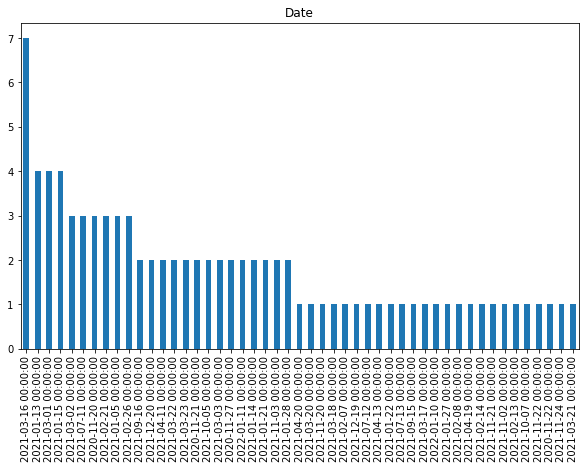

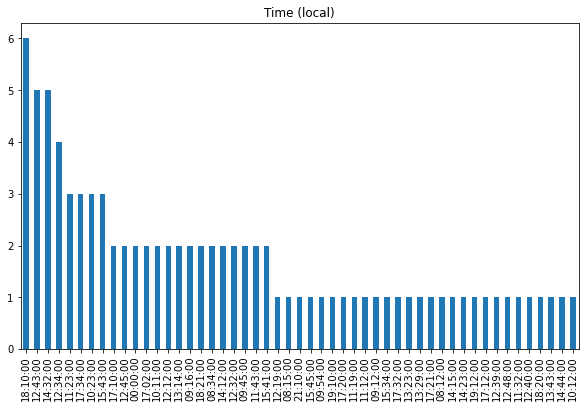

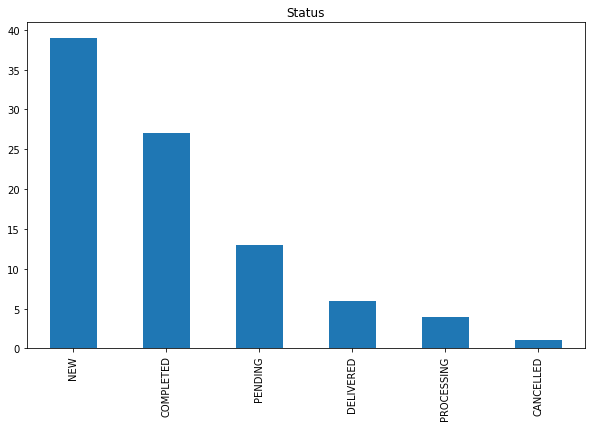

In [108]:
for col in cat_df:
    plt.figure(figsize=(10, 6))
    file[col].value_counts().plot.bar()
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [77]:
#Type column is not pertinent so to drop

In [109]:
del file['Type']

In [110]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Debtor          90 non-null     object        
 1   Creditor        90 non-null     object        
 2   Reference       90 non-null     object        
 3   Initial Amount  90 non-null     float64       
 4   Currency        90 non-null     object        
 5   Bank            90 non-null     object        
 6   Charges         90 non-null     float64       
 7   Date            90 non-null     datetime64[ns]
 8   Time (local)    90 non-null     object        
 9   Status          90 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 7.2+ KB


In [111]:
cor=file.corr()
cor

,Initial Amount,Charges
Initial Amount,1.000000,-0.087271
Charges,-0.087271,1.000000


In [112]:
#We check Date range to make sure there are not outliers
print(file['Date'].min())
print(file['Date'].max())
#file['Dt_Customer'].value_counts()

2020-11-20 00:00:00
2022-01-11 00:00:00


<Figure size 720x432 with 0 Axes>

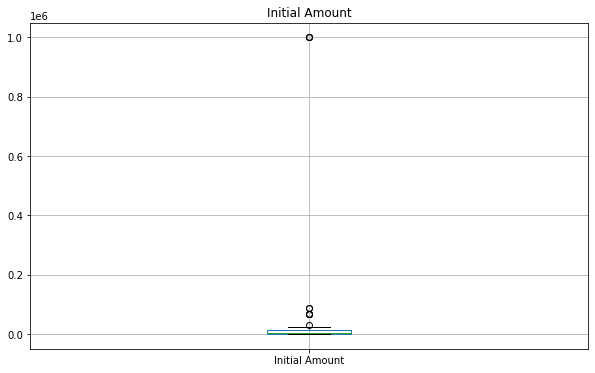

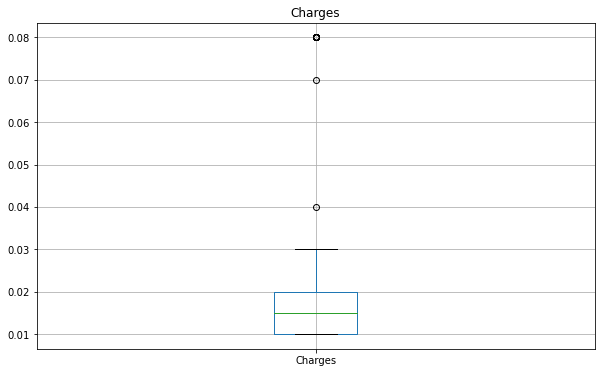

In [116]:
#Check Outliers - once cleaned

# Plot the variables (loop for plot variables) for num values
# We look for numeric data
#num_df = file.select_dtypes(exclude=['object'])
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    file.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'2.png',bbox_inches='tight')

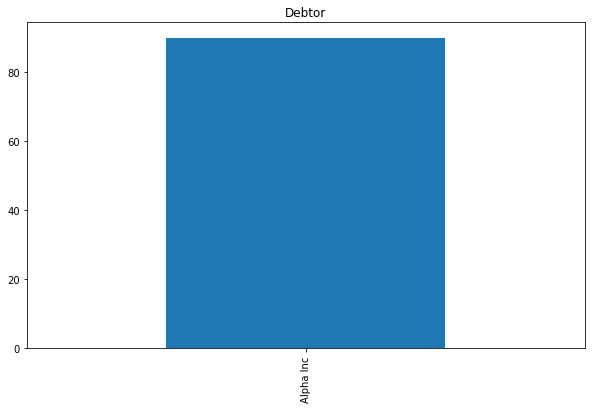

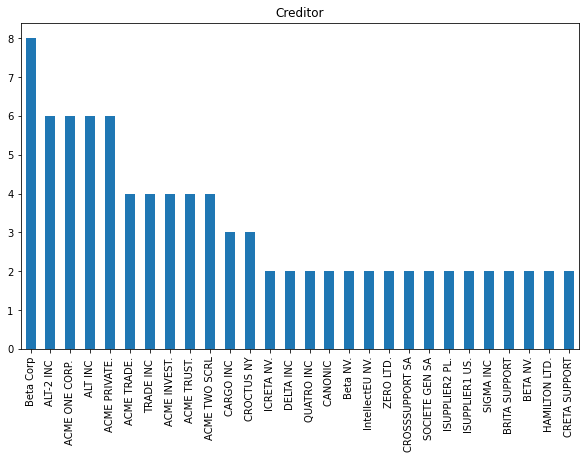

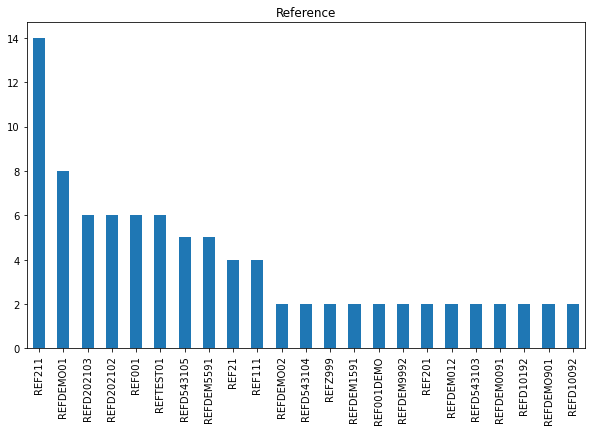

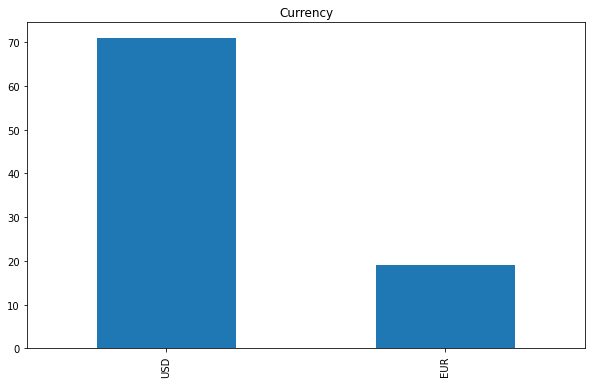

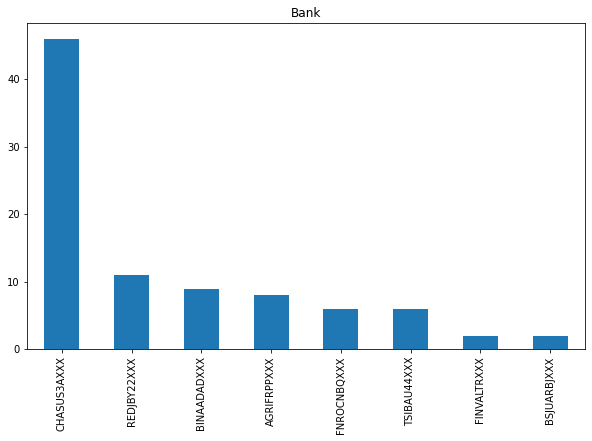

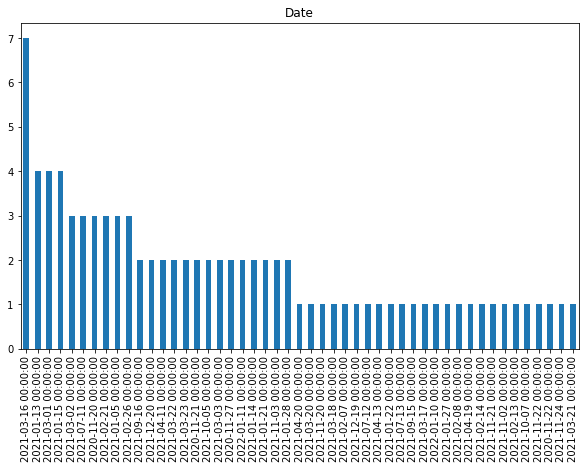

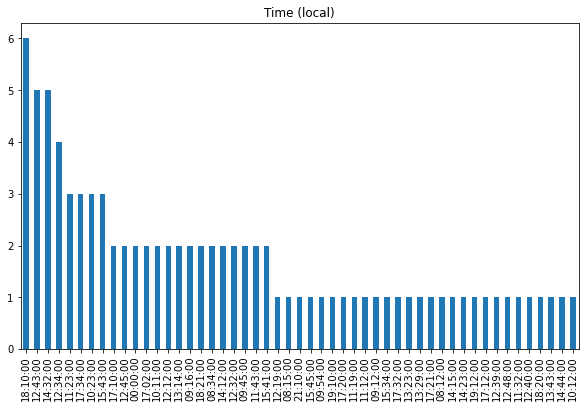

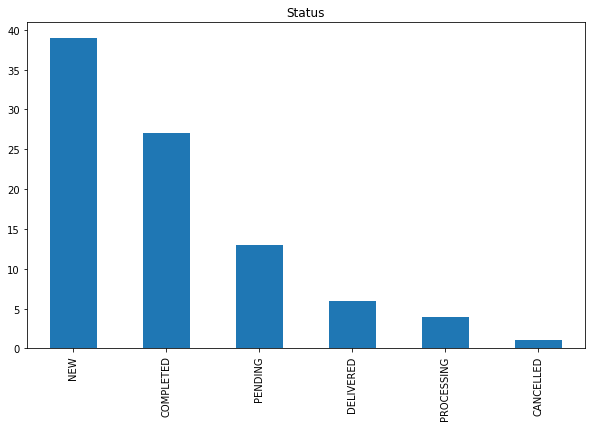

In [119]:
## We look for non-numeric data
#cat_df = file.select_dtypes(include=['object'])
for col in cat_df:
    plt.figure(figsize=(10, 6))
    file[col].value_counts().plot.bar()
    plt.title(col)
    plt.savefig(col+r'2.png',bbox_inches='tight')

In [120]:
##Exporting File before encoding
file.to_excel(r"C:\Users\Michel\git2\Ironhack-DAFT-Project6-Descriptive_predictive_analysis_visualization_in_Tableau\Payments_clean.xlsx")